In [1]:
import os
from pathlib import Path
import xml.etree.ElementTree as ET
import pandas as pd
import pathlib
import tensorflow as tf
from skimage import io

2023-08-05 05:14:28.926652: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 05:14:28.961423: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 05:14:28.962526: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 05:14:29.867439: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
os.chdir("../")
%pwd

'/workspace/dogbreeds_dect'

In [3]:
def read_xml_annotation(xml_file_path):
    """
    doc
    """
    try:
        # Parse the XML file
        tree = ET.parse(xml_file_path)
        root = tree.getroot()

        # Extract relevant information from the XML
        folder = root.find('folder').text
        filename = root.find('filename').text
        database = root.find('source/database').text
        width = int(root.find('size/width').text)
        height = int(root.find('size/height').text)
        depth = int(root.find('size/depth').text)
        object_name = root.find('object/name').text
        pose = root.find('object/pose').text
        truncated = int(root.find('object/truncated').text)
        difficult = int(root.find('object/difficult').text)
        xmin = int(root.find('object/bndbox/xmin').text)
        ymin = int(root.find('object/bndbox/ymin').text)
        xmax = int(root.find('object/bndbox/xmax').text)
        ymax = int(root.find('object/bndbox/ymax').text)

        # Create a dictionary to hold the extracted information
        annotation_info = {
            'folder': folder,
            'filename': filename,
            'database': database,
            'width': width,
            'height': height,
            'depth': depth,
            'object_name': object_name,
            'pose': pose,
            'truncated': truncated,
            'difficult': difficult,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax
        }

        return annotation_info

    except ET.ParseError as error:
        print(f"Error parsing XML file: {error}")
        return None
    except Exception as error:
        print(f"Error reading XML file: {error}")
        return None

def check_file_type(file_path):
    if os.path.isfile(file_path):
        return "Regular File"
    elif os.path.isdir(file_path):
        return "Directory"
    elif os.path.islink(file_path):
        return "Symbolic Link"
    else:
        return "Other"

In [4]:
def list_files_in_directory(directory_path):
    try:
        # Get a list of files and directories in the specified path
        files_and_directories = os.listdir(directory_path)

        # Filter out only the files from the list
        files_list = [file for fille in files_and_directories if os.path.isfile(file:= os.path.join(directory_path, fille))]

        return files_list

    except FileNotFoundError:
        print(f"Directory not found: {directory_path}")
        return []
    except Exception as e:
        print(f"Error while listing files: {e}")
        return []


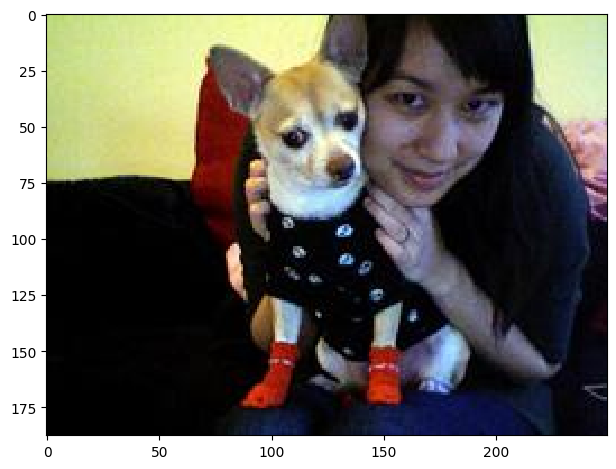

In [6]:
img  = io.imread(image)
io.imshow(img)

In [25]:
def main(dir, main_dataframe):
    list_dataframes = []
    for main_dir, labels_dir, filenames in os.walk(dir,topdown= True):
        for num, _class in enumerate(labels_dir):
            #print(_class)
            class_dir = os.path.join(dir, _class)
            class_files = list_files_in_directory(class_dir)
            #print(class_files[:5])
            for file in class_files:
                data = read_xml_annotation(file)
                data_df = pd.DataFrame([data])
                list_dataframes.append(data_df)
    return list_dataframes

def list_files_in_directory(directory_path):
    try:
        # Get a list of files and directories in the specified path
        files_and_directories = os.listdir(directory_path)

        # Filter out only the files from the list
        files_list = [file for fille in files_and_directories if os.path.isfile(file:= os.path.join(directory_path, fille))]

        return files_list

    except FileNotFoundError:
        print(f"Directory not found: {directory_path}")
        return []
    except Exception as e:
        print(f"Error while listing files: {e}")
        return []

In [5]:
image = "data/raw/stanford-dogs-dataset/images/Images/n02085620-Chihuahua/n02085620_7.jpg"
sample = "data/raw/stanford-dogs-dataset/annotations/Annotation/n02085620-Chihuahua/n02085620_7"
data_directory_path = "data/raw/stanford-dogs-dataset/annotations/Annotation/"
dog = "data/raw/stanford-dogs-dataset/annotations/Annotation/n02085620-Chihuahua"

In [27]:
main(data_directory_path)

n02085620-Chihuahua
n02085782-Japanese_spaniel
n02085936-Maltese_dog
n02086079-Pekinese
n02086240-Shih-Tzu
n02086646-Blenheim_spaniel
n02086910-papillon
n02087046-toy_terrier
n02087394-Rhodesian_ridgeback
n02088094-Afghan_hound


IndexError: list index out of range

In [26]:
main_dataframe = pd.DataFrame()
df = main(data_directory_path, main_dataframe)

In [19]:
df[:2]

[{'folder': '02085620',
  'filename': 'n02085620_10074',
  'database': 'ImageNet database',
  'width': 333,
  'height': 500,
  'depth': 3,
  'object_name': 'Chihuahua',
  'pose': 'Unspecified',
  'truncated': 0,
  'difficult': 0,
  'xmin': 25,
  'ymin': 10,
  'xmax': 276,
  'ymax': 498},
 {'folder': '02085620',
  'filename': 'n02085620_10131',
  'database': 'ImageNet database',
  'width': 395,
  'height': 495,
  'depth': 3,
  'object_name': 'Chihuahua',
  'pose': 'Unspecified',
  'truncated': 0,
  'difficult': 0,
  'xmin': 49,
  'ymin': 9,
  'xmax': 393,
  'ymax': 493}]

In [27]:
main_df= pd.concat([main_dataframe] + df)
main_df.head()

,folder,filename,database,width,height,depth,object_name,pose,truncated,difficult,xmin,ymin,xmax,ymax
0,02085620,n02085620_10074,ImageNet database,333,500,3,Chihuahua,Unspecified,0,0,25,10,276,498
0,02085620,n02085620_10131,ImageNet database,395,495,3,Chihuahua,Unspecified,0,0,49,9,393,493
0,02085620,n02085620_10621,ImageNet database,500,298,3,Chihuahua,Unspecified,0,0,142,43,335,250
0,02085620,n02085620_1073,ImageNet database,345,500,3,Chihuahua,Unspecified,0,0,0,27,312,498
0,02085620,n02085620_10976,ImageNet database,322,484,3,Chihuahua,Unspecified,0,0,90,104,242,452


In [28]:
main_df.shape

(20580, 14)

In [41]:
imagess = tf.io.gfile.glob("data/raw/stanford-dogs-dataset/images/Images/*/*jpg")

In [42]:
len(imagess)

20580